File used for testing outputs and methods

In [166]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import os

In [167]:
#Function to read a specified excel file and sheet number
def readInData (fileName,sheet):
    current_dir = os.getcwd()
    file_dir = current_dir+fileName
    data = pd.read_excel(file_dir,sheet) #Reads in the specified sheet index from the data file
    clean = data.iloc[18::15,[0,3,7,11]] #Takes only the totals from each location and only the male, female and total pass %s
    clean.columns = ['Location','Male%','Female%','Total%']
    clean = clean.drop(clean[clean['Male%'] == '..'].index)
    clean = clean.drop(clean[clean['Female%'] == '..'].index)
    clean = clean.drop(clean[clean['Total%'] == '..'].index)
    clean = clean.reset_index(drop=True) #Tidies up dataframe by correcting index values
    clean = clean.astype({'Male%':'float','Female%':'float','Total%':'float'})
    clean['Location'] = clean['Location'].str.replace('Total', '')
    return clean

In [168]:
#Function to print max and min values for each column for the months only as a dataframe
def maxMinValuesReturn (df):
    maxMale = df[df['Male%']==df['Male%'].max()]
    maxMale['Index'] = 'maxMale'
    minMale = df[df['Male%']==df['Male%'].min()]
    minMale['Index'] = 'minMale'
    maxFemale = df[df['Female%']==df['Female%'].max()]
    maxFemale['Index'] = 'maxFemale'
    minFemale = df[df['Female%']==df['Female%'].min()]
    minFemale['Index'] = 'minFemale'
    maxTotal = df[df['Total%']==df['Total%'].max()]
    maxTotal['Index'] = 'maxTotal'
    minTotal = df[df['Total%']==df['Total%'].min()]
    minTotal['Index'] = 'minTotal'
    rdf = pd.concat([maxMale,minMale,maxFemale,minFemale,maxTotal,minTotal],axis=0)
    rdf.set_index('Index', inplace = True)
    rdf = rdf.rename_axis(None)
    return rdf

In [169]:
#Function to get the geographical location of a row that has a max or min value
#Deprecated function - no longer in use
def getLocationNames (df,tofind):
    nums = tofind.index.tolist()
    print(nums)
    names = []
    for i in range(0,len(nums)):
        for j in range (0,13):
            print(nums[i]-j)
            if (df.loc[nums[i]-j]['Location']) == '':
                names.append((df.loc[nums[i]-j+1]['Location']))
    return names

In [170]:
#Function to print max and min values for each column as a dataframe
#Deprecated function - no longer in use
def maxMinValuesPrint (df):
    maxMale = df[df['Male%']==df['Male%'].max()]
    minMale = df[df['Male%']==df['Male%'].min()]
    maxFemale = df[df['Female%']==df['Female%'].max()]
    minFemale = df[df['Female%']==df['Female%'].min()]
    maxTotal = df[df['Total%']==df['Total%'].max()]
    minTotal = df[df['Total%']==df['Total%'].min()]
    print('Male Max:\n'+str(maxMale)+'\nMale Min:\n'+str(minMale)+'\nFemale Max:\n'+str(maxFemale)+'\nFemale Min:\n'+str(minFemale)+'\nTotal Max:\n'+str(maxTotal)+'\nTotal Min:\n'+str(minTotal))
    return

In [171]:
fileName = '/testcenterdata.xlsx'
y24 = readInData(fileName,3).copy(deep=True)
print(y24)

         Location      Male%    Female%     Total%
0       Aberdeen   46.205734  50.601719  48.213585
1    Aberystwyth   44.086022  52.043011  47.545582
2      Aldershot   44.211687  48.373600  46.082893
3        Alnwick   45.984252  45.936396  45.961699
4        Andover   46.153846  50.304790  48.050398
..            ...        ...        ...        ...
185      Worksop   45.783133  41.317365  43.543544
186     Worthing   44.986511  48.759865  46.660830
187      Wrexham   41.346588  47.921615  44.187837
188       Yeovil   43.008475  49.646821  45.932731
189         York   47.121134  53.464778  50.112846

[190 rows x 4 columns]


In [172]:
y24c = maxMinValuesReturn(y24)
y24c

,Location,Male%,Female%,Total%
maxMale,Saxmundham,61.904762,47.826087,54.545455
minMale,Bowmore (Isle of Islay),27.272727,40.000000,35.087719
maxFemale,Ullapool,47.368421,90.909091,63.333333
minFemale,Cumnock,54.545455,30.434783,42.222222
maxTotal,Ullapool,47.368421,90.909091,63.333333
minTotal,Newton Stewart,33.333333,36.666667,34.848485


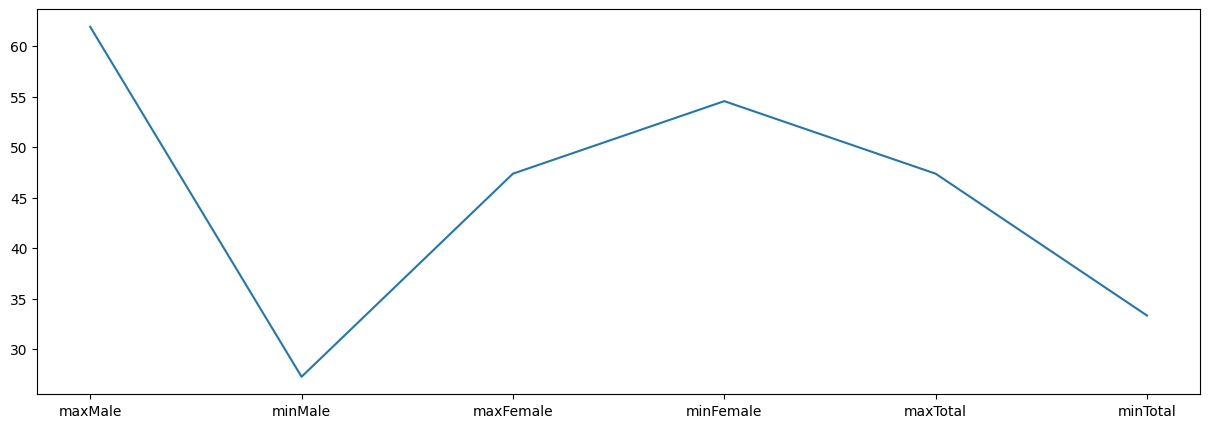

In [173]:
#Creating first plot
fig,ax = plt.subplots(figsize=(15,5))
ax = plt.plot(y24c['Male%']) 